In [28]:
import matplotlib as plot
import seaborn as sns
import pandas as pd
import datetime
import re
from sqlalchemy import create_engine

#Function to convert vote to numeric
def convert_votes_to_numeric(votes_str):
  if pd.isna(votes_str) or not isinstance(votes_str, str):
    return np.nan
  cleaned_str = votes_str.strip('() ').upper()
  if not cleaned_str:
        return np.nan
  try:
        if 'K' in cleaned_str:
            numeric_part = cleaned_str.replace('K', '')
            value = float(numeric_part) * 1000
        else:
            value = float(cleaned_str)

        return int(value)
  except ValueError:
      print(f"Warning: Could not convert '{votes_str}' (cleaned to '{cleaned_str}') to numeric. Returning NaN.")
      return np.nan

#Function to convert duration to minute
def convert_duration_to_minutes(duration_str):
    hours = 0
    minutes = 0
    duration_str = duration_str.lower()
    hour_match = re.search(r'(\d+)h', duration_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)m', duration_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes


#MySQL database
host = "localhost"
user = "root"
password = "root"
database = "imdb"

#SQLAlchemy connection
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

#Read data
df = pd.read_sql("SELECT * FROM imdb_table", con=engine)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie_name  3564 non-null   object 
 1   Rating      3564 non-null   float64
 2   Votes       3564 non-null   object 
 3   Duration    3564 non-null   object 
 4   genre       3564 non-null   object 
dtypes: float64(1), object(4)
memory usage: 139.3+ KB


In [29]:
#Data transformation

df['Rating'] = df['Rating'].astype(float)

df['Votes_numeric'] = df['Votes'].apply(convert_votes_to_numeric)

df['Duration_minutes'] = df['Duration'].apply(convert_duration_to_minutes)

print(df.info())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie_name        3564 non-null   object 
 1   Rating            3564 non-null   float64
 2   Votes             3564 non-null   object 
 3   Duration          3564 non-null   object 
 4   genre             3564 non-null   object 
 5   Votes_numeric     3564 non-null   int64  
 6   Duration_minutes  3564 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 195.0+ KB
None
          Movie_name  Rating    Votes Duration   genre  Votes_numeric  \
0       Gladiator II     6.5   (256K)   2h 28m  action         256000   
1     Dune: Part Two     8.5   (645K)   2h 46m  action         645000   
2    Fight or Flight     6.4    (15K)   1h 42m  action          15000   
3           Twisters     6.5   (177K)    2h 2m  action         177000   
4  Kraven the Hunter     5.5    (64K)

Top 10 Movies by Rating and Voting Counts: Identify movies with the highest ratings and significant voting engagement

In [35]:
top_10_movies = df.sort_values(by=['Votes_numeric', 'Rating'], ascending=[False, False]).head(10)
top_10 = top_10_movies[['Movie_name', 'Rating', 'Votes', 'Duration', 'genre']]
print(top_10)

                   Movie_name  Rating    Votes Duration      genre
1              Dune: Part Two     8.5   (645K)   2h 46m     action
5        Deadpool & Wolverine     7.5   (510K)    2h 8m     action
1747            The Substance     7.2   (321K)   2h 21m     horror
12    Furiosa: A Mad Max Saga     7.5   (293K)   2h 28m     action
0                Gladiator II     6.5   (256K)   2h 28m     action
1751           Alien: Romulus     7.1   (255K)   1h 59m     horror
9                   Civil War     7.0   (245K)   1h 49m     action
14               The Fall Guy     6.8   (228K)    2h 6m     action
2819             The Fall Guy     6.8   (228K)    2h 6m    romance
867              Inside Out 2     7.5   (224K)   1h 36m  animation


Genre Distribution: Plot the count of movies for each genre in a bar chart.

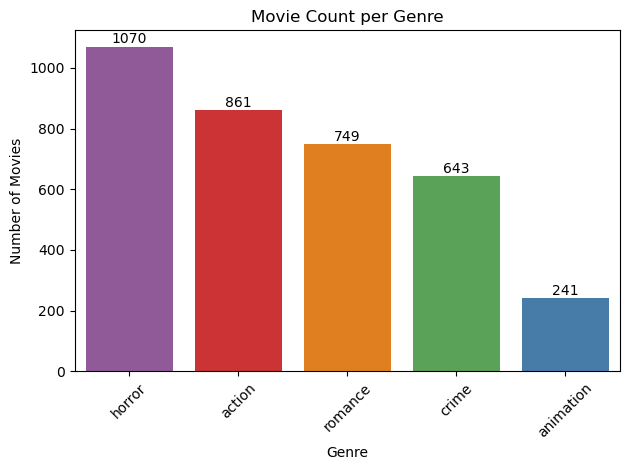

In [138]:
import matplotlib.pyplot as plot

ax = sns.countplot(
    data=df,
    x='genre',
    order=df['genre'].value_counts().index,  # sort bars by count
    hue='genre',
    legend=False,
    palette='Set1'
)

for bar in ax.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(x_pos, height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plot.title('Movie Count per Genre')
plot.xlabel('Genre')
plot.ylabel('Number of Movies')
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()


Average Duration by Genre: Show the average movie duration per genre in a horizontal bar chart.

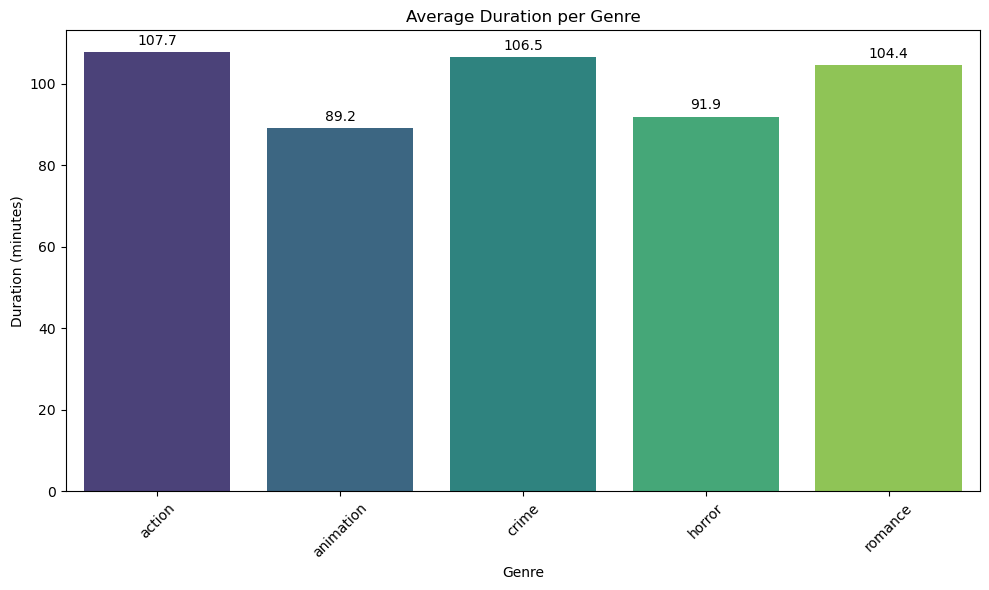

In [137]:
import matplotlib.pyplot as plot

plot.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    y='Duration_minutes', 
    x='genre',
    errorbar=None,
    hue ='genre',
    legend=False,
    palette='viridis',  
    estimator='mean'   
)

for bar in ax.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(x_pos, height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plot.title('Average Duration per Genre')
plot.ylabel('Duration (minutes)')
plot.xlabel('Genre')
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

Voting Trends by Genre: Visualize average voting counts across different genres.

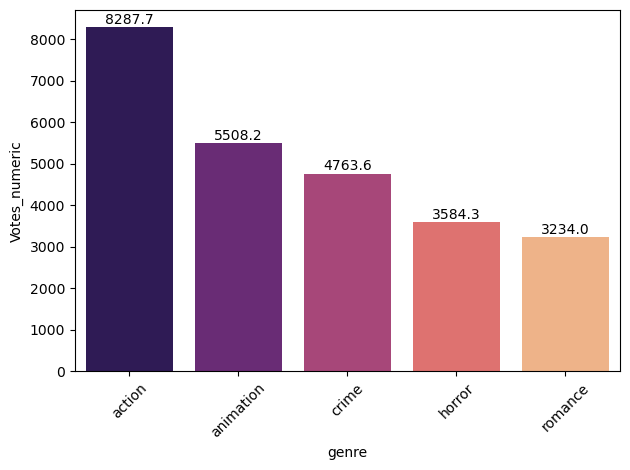

In [136]:
ax=sns.barplot(
    data=df,
    x='genre',              
    y='Votes_numeric',      
    palette='magma',
    errorbar=None,         
    hue='genre',
    legend=False,
    estimator='mean'
)

for bar in ax.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(x_pos, height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

Rating Distribution: Display a histogram or boxplot of movie rating

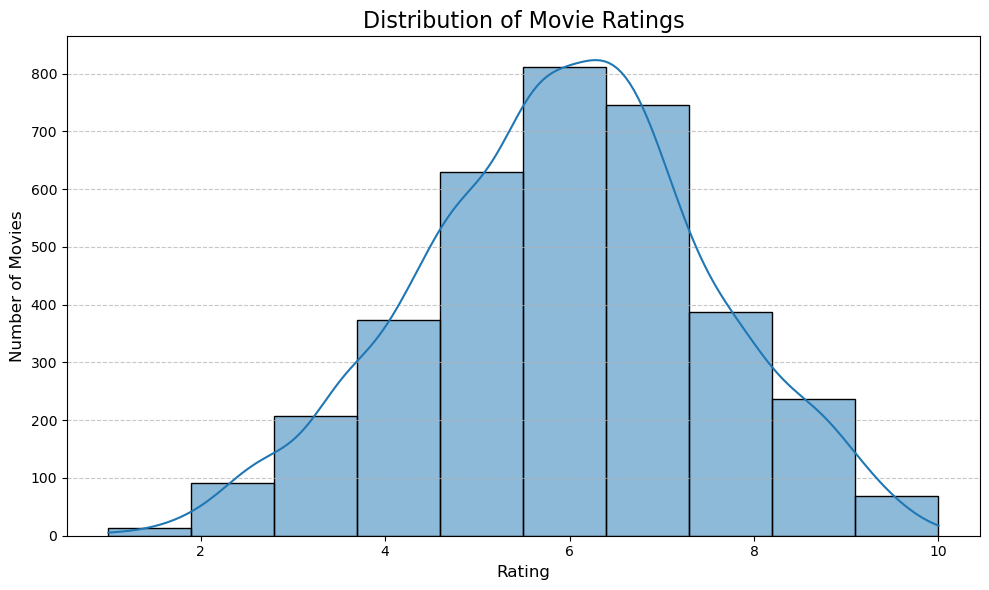

In [90]:
plot.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=10, kde=True)
plot.title('Distribution of Movie Ratings', fontsize=16)
plot.xlabel('Rating', fontsize=12)
plot.ylabel('Number of Movies', fontsize=12)
plot.grid(axis='y', linestyle='--', alpha=0.7)
plot.tight_layout()
plot.show()

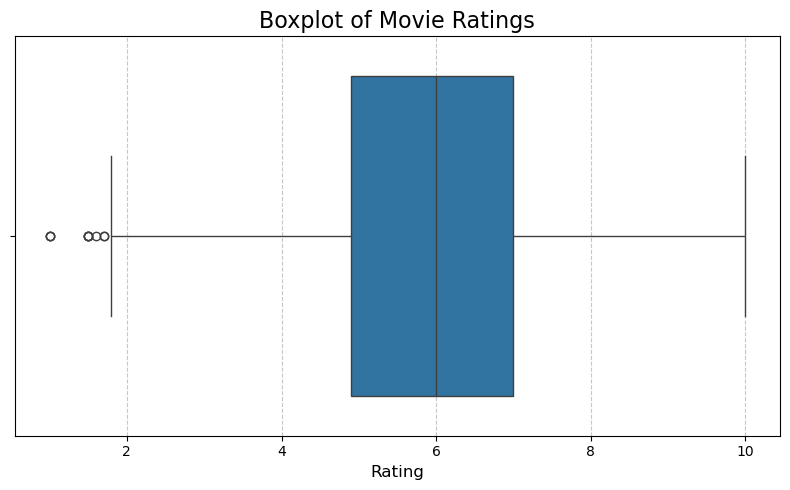

In [92]:
plot.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Rating') # 'y' can also be used for a vertical boxplot
plot.title('Boxplot of Movie Ratings', fontsize=16)
plot.xlabel('Rating', fontsize=12)
plot.grid(axis='x', linestyle='--', alpha=0.7) # Grid on x-axis for horizontal boxplot
plot.tight_layout()
plot.show()

Genre-Based Rating Leaders: Highlight the top-rated movie for each genre in a table

In [98]:
#df_filtered = df[df['Votes_numeric'] > 1000]

top_rated_idx = df.groupby('genre')['Rating'].idxmax()

top_rated_movies = df.loc[top_rated_idx, ['Movie_name', 'Rating', 'Votes', 'Duration', 'genre']]

top_rated_movies = top_rated_movies.reset_index(drop=True)

print(top_rated_movies)

        Movie_name  Rating  Votes Duration      genre
0     La Chakalosa    10.0    (5)   1h 36m     action
1  Among Neighbors     9.7   (51)   1h 40m  animation
2    Falsos Amigos    10.0    (5)   1h 53m      crime
3      Clownface 3     9.5   (41)   1h 44m     horror
4       Mann Behka     9.7    (7)   1h 17m    romance


Most Popular Genres by Voting: Identify genres with the highest total voting counts in a pie chart

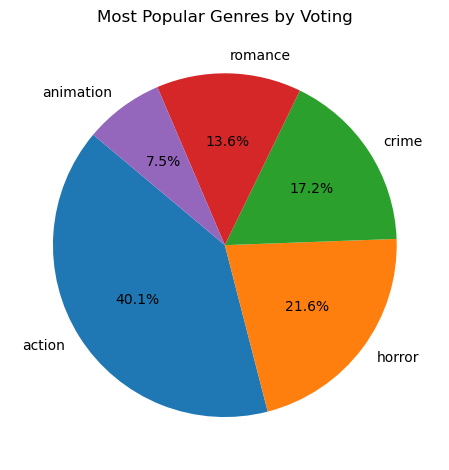

In [134]:
genre_votes = df.groupby('genre')['Votes_numeric'].sum().sort_values(ascending=False)

#plot.figure(figsize=(8, 8))
plot.pie(
    genre_votes,
    labels=genre_votes.index,
    autopct='%1.1f%%',
    startangle=140
)

plot.title('Most Popular Genres by Voting')
#plot.axis('equal')  # Equal aspect ratio for a perfect circle
plot.tight_layout()
plot.show()

Duration Extremes: Use a table or card display to show the shortest and longest movies

In [111]:
# # Get the shortest movie
# shortest_movie = df.loc[df['Duration_minutes'].idxmin(), ['Movie_name', 'Duration', 'Duration_minutes', 'genre', 'Rating', 'Votes']]

# # Get the longest movie
# longest_movie = df.loc[df['Duration_minutes'].idxmax(), ['Movie_name', 'Duration', 'Duration_minutes', 'genre', 'Rating', 'Votes']]

# # Combine into a single DataFrame for display
# duration_extremes = pd.DataFrame([shortest_movie, longest_movie])
# duration_extremes.index = ['Shortest Movie', 'Longest Movie']

# # Display
# print(duration_extremes)


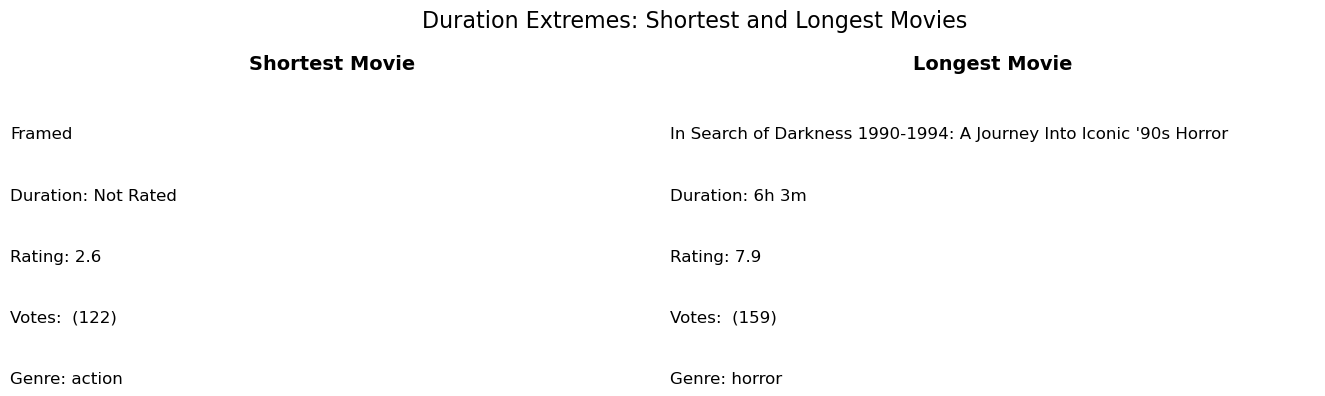

In [128]:
shortest = df.loc[df['Duration_minutes'].idxmin()]
longest = df.loc[df['Duration_minutes'].idxmax()]

fig, axs = plot.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Duration Extremes: Shortest and Longest Movies", fontsize=16)

axs[0].axis('off')
axs[0].set_title('Shortest Movie', fontsize=14, fontweight='bold')
axs[0].text(0, 0.8, f"{shortest['Movie_name']}", fontsize=12)
axs[0].text(0, 0.6, f"Duration: {shortest['Duration']}", fontsize=12)
axs[0].text(0, 0.4, f"Rating: {shortest['Rating']}", fontsize=12)
axs[0].text(0, 0.2, f"Votes: {shortest['Votes']}", fontsize=12)
axs[0].text(0, 0.0, f"Genre: {shortest['genre']}", fontsize=12)

axs[1].axis('off')
axs[1].set_title('Longest Movie', fontsize=14, fontweight='bold')
axs[1].text(0, 0.8, f"{longest['Movie_name']}", fontsize=12)
axs[1].text(0, 0.6, f"Duration: {longest['Duration']}", fontsize=12)
axs[1].text(0, 0.4, f"Rating: {longest['Rating']}", fontsize=12)
axs[1].text(0, 0.2, f"Votes: {longest['Votes']}", fontsize=12)
axs[1].text(0, 0.0, f"Genre: {longest['genre']}", fontsize=12)

plot.tight_layout()
plot.show()

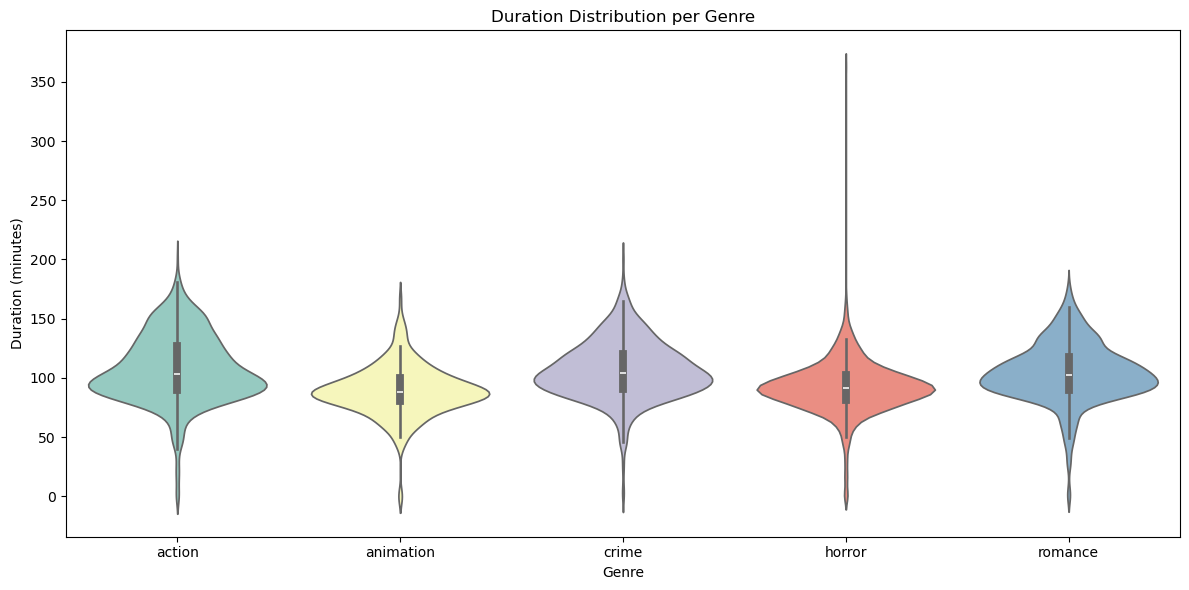

In [139]:
plot.figure(figsize=(12, 6))
sns.violinplot(data=df, x='genre', y='Duration_minutes', palette='Set3', hue='genre', legend=False)
plot.title('Duration Distribution per Genre')
plot.xlabel('Genre')
plot.ylabel('Duration (minutes)')
#plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

Ratings by Genre: Use a heatmap to compare average ratings across genre

In [116]:
# #genre_rating = df.groupby('genre')['Rating'].mean().sort_values(ascending=False)

# #genre_rating_df = genre_rating.to_frame().T

# sns.heatmap(
#     data=df,
#     annot=True,
#     cmap='YlGnBu',
#     cbar=True,
#     linewidths=0.5,
#     fmt=".1f"
# )

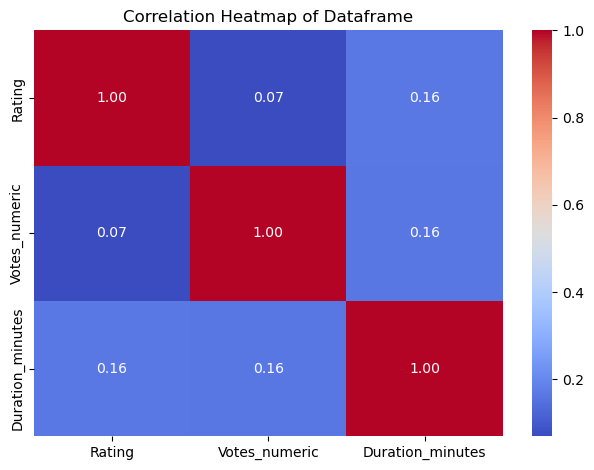

In [148]:
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plot.title("Correlation Heatmap of Dataframe")
plot.tight_layout()
plot.show()

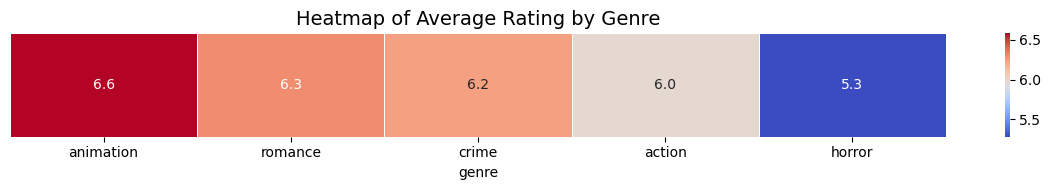

In [145]:
genre_rating = df.groupby('genre')['Rating'].mean().sort_values(ascending=False)

genre_rating_df = genre_rating.to_frame().T

plot.figure(figsize=(12, 2))
sns.heatmap(
    genre_rating_df,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5
)

plot.title('Heatmap of Average Rating by Genre', fontsize=14)
plot.yticks([], [])  # Hide y-axis row label
plot.tight_layout()
plot.show()

Correlation Analysis: Analyze the relationship between ratings and voting counts using a scatter plot

<Figure size 1000x600 with 0 Axes>

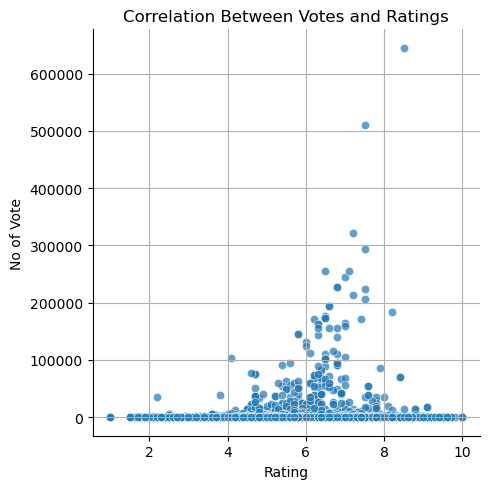

In [142]:
plot.figure(figsize=(10, 6))

sns.relplot(
    data=df,
    y='Votes_numeric',
    x='Rating',
    #hue='genre',
    alpha=0.7
)

plot.title('Correlation Between Votes and Ratings')
plot.xlabel('Rating')
plot.ylabel('No of Vote')
plot.grid(True)
plot.tight_layout()
plot.show()

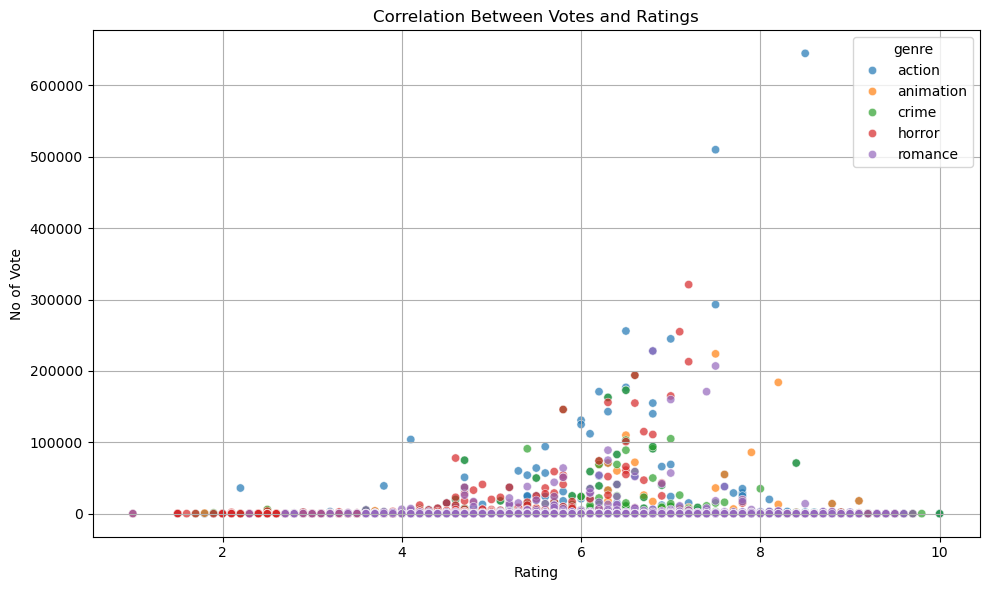

In [141]:
plot.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    y='Votes_numeric',
    x='Rating',
    hue='genre',
    alpha=0.7
)

plot.title('Correlation Between Votes and Ratings')
plot.xlabel('Rating')
plot.ylabel('No of Vote')
plot.grid(True)
plot.tight_layout()
plot.show()